# 4회차 실습 과제

## 문제 항목

| 문제     | 주제                         | 핵심 개념                                                         |
|----------|------------------------------|-------------------------------------------------------------------|
| 문제 1   | 편의점 일일 매출 분석        | 정규성 검정, 단일표본 검정 (t vs Wilcoxon), 효과크기, 모수 vs 비모수 비교 |
| 문제 2   | 두 생산라인 제품 무게 비교   | 등분산 검정, 독립표본 검정 (Welch's t vs Mann-Whitney U), 이상치 영향   |
| 문제 3   | 요일별 고객 방문 패턴 분석   | 카이제곱 적합도 검정, Cohen's w, 표준화 잔차, Cochran's rule, Monte Carlo |
| 문제 4   | 연령대별 운동 선호도 조사    | 카이제곱 독립성 검정, Cramér's V, 조정된 잔차, Fisher 정확검정 (2×2)    |

---

## 핵심 공식 정리

### 가설검정 프로세스

| 단계 | 내용                                   | 비고                                          |
|------|----------------------------------------|-----------------------------------------------|
| 1    | **분석 목표** 파악                     | 무엇을 검정하려 하는지 명확히 정의합니다       |
| 2    | **가설 설정** (H₀, H₁)                | 귀무가설과 대립가설을 수식으로 표현합니다       |
| 3    | **검정 방향** 결정                     | 양측/단측 검정을 선택하고 근거를 제시합니다     |
| 4    | **가정 검정**                          | 정규성, 등분산, 기대빈도 조건 등을 확인합니다   |
| 5    | **검정 수행**                          | 가정 결과에 따라 적절한 검정을 선택합니다       |
| 6    | **효과크기** 산출                      | 통계적 유의성과 별개로 실질적 의미를 판단합니다 |
| 7    | **결론** 도출                          | p-value와 효과크기를 종합하여 해석합니다        |

> 카이제곱 검정(적합도, 독립성)은 검정 자체가 "차이 존재 여부"를 판정하므로
> 양측/단측 개념이 적용되지 않습니다 (3단계 생략).

### 양측검정 vs 단측검정

| 구분          | 양측검정 (two-sided)           | 단측검정 (one-sided)              |
|---------------|--------------------------------|-----------------------------------|
| H₁ 형태      | μ ≠ μ₀                        | μ > μ₀ 또는 μ < μ₀              |
| 사용 시기     | 방향을 사전에 특정할 수 없을 때 | 이론적·실무적 근거로 방향이 명확할 때 |
| 검정력        | 상대적으로 낮음                | 같은 α에서 더 높은 검정력         |
| 주의          | 가장 보수적이고 안전한 선택     | 사전 근거 없이 사용하면 부적절     |

### 정규성 검정

| 방법            | 판정 기준                          | 비고                              |
|-----------------|------------------------------------|-----------------------------------|
| Shapiro-Wilk    | p > 0.05 → 정규성 기각 못 함      | 소표본에 적합, 대표본에서 과민    |
| Q-Q Plot        | 점들이 대각선 위 → 정규            | 시각적 판단, Shapiro-Wilk와 함께  |

### 검정 선택 가이드 (연속형)

| 상황            | 정규성 충족                     | 정규성 위반                   |
|-----------------|---------------------------------|-------------------------------|
| 단일·대응표본   | 단일/대응표본 t-검정            | Wilcoxon signed-rank          |
| 독립 2집단      | Student's t (등분산) / Welch's t (이분산) | Mann-Whitney U        |

### 비모수 검정 효과크기

| 효과크기         | 적용 검정               | 해석 기준 (small / medium / large) |
|------------------|-------------------------|------------------------------------|
| rank-biserial r  | Wilcoxon, Mann-Whitney  | 0.1 / 0.3 / 0.5                   |

### 카이제곱 검정

| 검정           | 공식                                                          | 자유도                   |
|----------------|---------------------------------------------------------------|--------------------------|
| 적합도 검정    | $\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$                   | $df = k - 1$            |
| 독립성 검정    | $\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$          | $df = (r-1)(c-1)$       |
| 기대빈도       | $E_{ij} = \frac{R_i \times C_j}{N}$                          | —                        |

### 효과크기 (카이제곱)

| 효과크기     | 적용 검정      | 공식                                        | 해석 기준 (small / medium / large) |
|--------------|----------------|---------------------------------------------|------------------------------------|
| Cohen's w    | 적합도         | $\sqrt{\chi^2 / N}$                        | 0.1 / 0.3 / 0.5                   |
| Cramér's V   | 독립성         | $\sqrt{\chi^2 / (N \cdot \min(r-1, c-1))}$ | df*에 따라 다름                    |
| φ (Phi)      | 독립성 (2×2)   | $\sqrt{\chi^2 / N}$                        | 0.1 / 0.3 / 0.5                   |

### Cochran's rule (기대빈도 조건)

| 조건 | 기준                                     | 위반 시 대안                              |
|------|------------------------------------------|-------------------------------------------|
| (1)  | 기대빈도 < 5인 셀이 전체의 20% 이하     | 적합도 → Monte Carlo / 범주 병합          |
| (2)  | 기대빈도 < 1인 셀이 0개                  | 독립성(2×2) → Fisher / 독립성(R×C) → FFH  |

### 판정 규칙

| p-value 결과  | 판정             | 해석                                          |
|---------------|------------------|-----------------------------------------------|
| p ≤ α         | H₀ **기각**      | "이 결과가 우연이라고 보기 어렵습니다" → 유의   |
| p > α         | H₀ **기각 실패** | "증거 부족, 판단 보류" (H₀가 참은 아닙니다!)    |

---

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

print("=" * 60)
print("4회차 실습 과제: 비모수 검정, 카이제곱 검정")
print("=" * 60)


4회차 실습 과제: 비모수 검정, 카이제곱 검정


---

## 문제 1: 편의점 일일 매출 분석

한 편의점 본사는 특정 지점의 일일 매출이 전국 평균 **250만원**과 다른지 확인하려 합니다.

20일간의 매출 데이터를 수집했는데, 매출 분포가 정규분포를 따르는지 먼저 확인해야 합니다.

**분석 목표**: 이 편의점의 일일 매출이 전국 평균(250만원)과 통계적으로 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [2]:
print("\n[문제 1] 편의점 일일 매출 분석")
print("=" * 50)

np.random.seed(501)
daily_sales = np.round(np.random.lognormal(mean=5.5, sigma=0.3, size=20), 1)
mu0_sales = 250.0  # 전국 평균 매출 (만원)

print(f"일일 매출 데이터 (n = {len(daily_sales)}일, 단위: 만원):")
print(daily_sales)
print(f"\n표본 평균: {np.mean(daily_sales):.1f}만원")
print(f"표본 중앙값: {np.median(daily_sales):.1f}만원")
print(f"전국 평균(μ₀): {mu0_sales}만원")



[문제 1] 편의점 일일 매출 분석
일일 매출 데이터 (n = 20일, 단위: 만원):
[249.5 157.8 304.8 352.4 137.4 213.2 298.3 209.3 363.6 363.4 194.7 418.4
 207.9 250.8 206.3 372.8 367.1 355.8 214.9 207.6]

표본 평균: 272.3만원
표본 중앙값: 250.2만원
전국 평균(μ₀): 250.0만원


### 문제 1-1: 정규성 검정 (가정 검정)

**(a)** 수치적 정규성 검정(Shapiro-Wilk)을 수행하세요.

**(b)** Q-Q Plot을 그려 시각적으로 분포를 확인하세요.

**(c)** 두 결과를 종합하여 "정규분포를 따르는가?"를 판단하고,

Q-Q Plot에서 관찰되는 패턴이 어떤 분포 특성을 나타내는지 설명하세요.

In [3]:
print("\n[문제 1-1] 정규성 검정")
print("-" * 40)

# TODO (a): 정규성 검정 수행
stat_sw, p_sw = stats.shapiro(daily_sales)

print(f"(a) 정규성 검정:")
print(f"    W = {stat_sw:.4f}")
print(f"    p-value = {p_sw:.4f}")
print(f"    판정: 유의수준을 0.05라 하면, p-value는 {p_sw:.4f}이므로 정규성을 기각하지 못해 정규성을 만족할 가능성이 높다.")
print(f"         그러나, 표본의 크기가 작은 편이기 때문에 Q-Q plot을 활용해 추가적으로 확인이 필요하다.")


[문제 1-1] 정규성 검정
----------------------------------------
(a) 정규성 검정:
    W = 0.9128
    p-value = 0.0720
    판정: 유의수준을 0.05라 하면, p-value는 0.0720이므로 정규성을 기각하지 못해 정규성을 만족할 가능성이 높다.
         그러나, 표본의 크기가 작은 편이기 때문에 Q-Q plot을 활용해 추가적으로 확인이 필요하다.


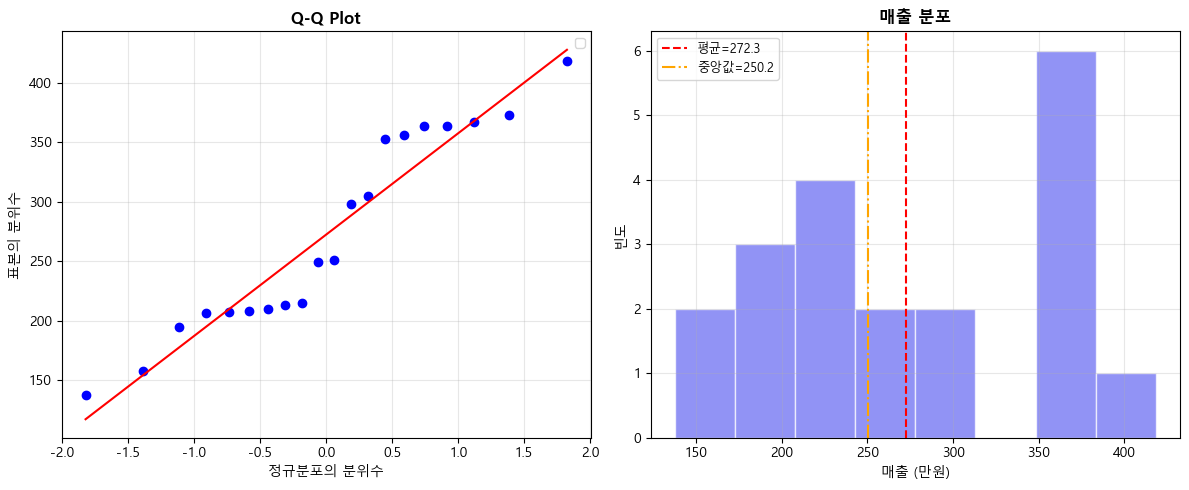

In [4]:
# TODO (b): Q-Q Plot + 히스토그램 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# TODO: Q-Q Plot 그리기
stats.probplot(daily_sales, dist='norm', plot=axes[0])
axes[0].set_xlabel("정규분포의 분위수")
axes[0].set_ylabel("표본의 분위수")
axes[0].legend(fontsize=9)

axes[0].set_title("Q-Q Plot", fontsize=12, fontweight="bold")
axes[0].grid(alpha=0.3)

# 히스토그램
axes[1].hist(daily_sales, bins=8, color="#6366F1", alpha=0.7, edgecolor="white")
axes[1].axvline(np.mean(daily_sales), color="red", linestyle="--", label=f"평균={np.mean(daily_sales):.1f}")
axes[1].axvline(np.median(daily_sales), color="orange", linestyle="-.", label=f"중앙값={np.median(daily_sales):.1f}")
axes[1].set_title("매출 분포", fontsize=12, fontweight="bold")
axes[1].set_xlabel("매출 (만원)")
axes[1].set_ylabel("빈도")
axes[1].legend(fontsize=9)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [5]:
# TODO (c): 종합 판단
print(f"\n(c) 종합 판단:")
print(f"    Shapiro-Wilk: 정규성을 기각할만한 충분한 증거가 없어서 정규성을 기각하지 못했으나, 작은 표본크기로 인해 Q-Q plot을 활용해 교차검증할 필요가 있다고 판단했다.")
print(f"    Q-Q Plot 패턴: 두꺼운 꼬리 분포의 패턴이 관찰된 것을 통해 꼬리가 정규분포보다 두껍다는 것을 예측할 수 있다.")
print(f"    결론: Shapiro-Wilk, Q-Q plot 패턴분석, 히스토그램을 통해 주어진 데이터는 비모수 검정을 사용하는 방법을 고려할 필요가 있을 것으로 보인다.")



(c) 종합 판단:
    Shapiro-Wilk: 정규성을 기각할만한 충분한 증거가 없어서 정규성을 기각하지 못했으나, 작은 표본크기로 인해 Q-Q plot을 활용해 교차검증할 필요가 있다고 판단했다.
    Q-Q Plot 패턴: 두꺼운 꼬리 분포의 패턴이 관찰된 것을 통해 꼬리가 정규분포보다 두껍다는 것을 예측할 수 있다.
    결론: Shapiro-Wilk, Q-Q plot 패턴분석, 히스토그램을 통해 주어진 데이터는 비모수 검정을 사용하는 방법을 고려할 필요가 있을 것으로 보인다.


### 문제 1-2: 가설 설정과 검정 수행

**(a)** 분석 목표에 맞는 **귀무가설(H₀)**과 **대립가설(H₁)**을 설정하세요.

**(b)** **양측검정** 또는 **단측검정** 중 어떤 것이 적절한지 결정하고, 그 근거를 설명하세요.

**(c)** 정규성 검정 결과를 바탕으로, 이 데이터에 적절한 검정 방법을 선택하고 그 이유를 설명하세요.

**(d)** 선택한 검정을 수행하세요 (α = 0.05).

**(e)** 효과크기를 계산하세요.

> 모수 검정인지 비모수 검정인지에 따라 적절한 효과크기 지표가 다릅니다.
> 해석 기준과 함께 보고하세요.

**(f)** p-value와 효과크기를 종합하여 최종 결론을 내리세요.

In [6]:
print("\n[문제 1-2] 가설 설정과 검정 수행")
print("-" * 40)

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 해당 편의점의 일일 매출은 전국 평균(250만원)과 차이가 없다.")
print(f"    H₁: 해당 편의점의 일일 매출은 전국 평균(250만원)과 차이가 있다.")

# TODO (b): 양측/단측 결정
print(f"\n(b) 검정 방향:")
print(f"    선택: 양측검정")
print(f"    근거: 분석 목적이 해당 편의점의 일일 매출이 전국 평균인 250만원과 통계적으로 유의한 차이가 있는지")
print(f"        검점하고 싶은 것이기 때문에 전국 평균보다 작거나 큰 경우의 수를 모두 고려하기 위함이다.")

# TODO (c): 검정 방법 선택
print(f"\n(c) 검정 방법 선택:")
print(f"    정규성 결과: 정규성 기각 여부가 애매하기 때문에 비모수 검정법을 사용하는 것을 고려할 필요가 있다.")
print(f"    선택: Wilcoxon signed-rank(단일표본)")
print(f"    이유: 해당 편의점의 매출 분포는 비대칭인 것으로 보인다. 따라서 이상치나 비대칭 분포의 영향을 줄일 수 있는")
print(f"         Wilcoxon signed-rank test을 사용하고자 한다.")

# TODO (d): 검정 수행
import pingouin as pg

mu0_sales = 250.0  # 전국 평균 매출 (만원)

# 단일 표본과 기준값의 차이를 분석하기 위해 daily_sales - mu0_sales를 전달
res = pg.wilcoxon(daily_sales - mu0_sales)

test_stat = res['W-val'].values[0]
p_value = res['p-val'].values[0]

print(f"\n(d) 검정 결과:")
print(f"    검정통계량: {test_stat:.4f}")
print(f"    p-value: {p_value:.4f}")
print(f"    판정 (α=0.05): p-value가 유의수준보다 크므로 귀무가설 기각을 보류한다.")

# TODO (e): 효과크기
effect_size = res['RBC'].values[0]

print(f"\n(e) 효과크기: {effect_size:.4f}")
print(f"    해석: 비모수 검정에서 통상적으로 효과크기가 0.3이라면 효과가 중간 정도인 편이다.")

# TODO (f): 종합 결론
print(f"\n(f) 종합 결론:")
print(f"     검정을 수행한 결과, p-value가 유의수준보다 크므로 해당 편의점의 일일 매출은 전국 평균(250만원)과 차이가 없다는 귀무가설을")
print(f"     기각할 수 없다. 효과크기는 0.31로 효과가 작다고 판단하긴 어렵지만, 종합적으로 판단했을 때 해당 편의점의 일일 매출이 전국 평균과")
print(f"     통계적으로 유의미한 차이가 있다고 보기 어렵다.")


[문제 1-2] 가설 설정과 검정 수행
----------------------------------------
(a) 가설 설정:
    H₀: 해당 편의점의 일일 매출은 전국 평균(250만원)과 차이가 없다.
    H₁: 해당 편의점의 일일 매출은 전국 평균(250만원)과 차이가 있다.

(b) 검정 방향:
    선택: 양측검정
    근거: 분석 목적이 해당 편의점의 일일 매출이 전국 평균인 250만원과 통계적으로 유의한 차이가 있는지
        검점하고 싶은 것이기 때문에 전국 평균보다 작거나 큰 경우의 수를 모두 고려하기 위함이다.

(c) 검정 방법 선택:
    정규성 결과: 정규성 기각 여부가 애매하기 때문에 비모수 검정법을 사용하는 것을 고려할 필요가 있다.
    선택: Wilcoxon signed-rank(단일표본)
    이유: 해당 편의점의 매출 분포는 비대칭인 것으로 보인다. 따라서 이상치나 비대칭 분포의 영향을 줄일 수 있는
         Wilcoxon signed-rank test을 사용하고자 한다.

(d) 검정 결과:
    검정통계량: 72.0000
    p-value: 0.2305
    판정 (α=0.05): p-value가 유의수준보다 크므로 귀무가설 기각을 보류한다.

(e) 효과크기: 0.3143
    해석: 비모수 검정에서 통상적으로 효과크기가 0.3이라면 효과가 중간 정도인 편이다.

(f) 종합 결론:
     검정을 수행한 결과, p-value가 유의수준보다 크므로 해당 편의점의 일일 매출은 전국 평균(250만원)과 차이가 없다는 귀무가설을
     기각할 수 없다. 효과크기는 0.31로 효과가 작다고 판단하긴 어렵지만, 종합적으로 판단했을 때 해당 편의점의 일일 매출이 전국 평균과
     통계적으로 유의미한 차이가 있다고 보기 어렵다.


### 문제 1-3: 모수 vs 비모수 비교

같은 데이터에 대해 **모수 검정과 비모수 검정을 모두** 수행하고, 결과를 비교해 보세요.

**(a)** 모수 검정(단일표본 t-검정)의 결과를 구하세요.

**(b)** 비모수 검정(Wilcoxon signed-rank)의 결과를 구하세요.

**(c)** 두 검정의 결론이 같은가요, 다른가요?

만약 다르다면, 이 데이터의 어떤 특성 때문에 차이가 발생하는지 설명하세요.

In [7]:
print("\n[문제 1-3] 모수 vs 비모수 비교")
print("-" * 40)

import pingouin as pg

# TODO (a): 모수 검정 (t-teat)
t_stat_1, p_t = stats.ttest_1samp(daily_sales, popmean=mu0_sales)

print(f"(a) 단일표본 t-검정: t = {t_stat_1:.4f}, p = {p_t:.4f}")

# TODO (b): 비모수 검정
res_1 = pg.wilcoxon(daily_sales - mu0_sales)
w_stat_1 = res['W-val'].values[0]
p_w = res['p-val'].values[0]

print(f"\n(b) Wilcoxon signed-rank: W = {w_stat_1:.2f}, p = {p_w:.4f}")

# TODO (c): 비교 해석
alpha = 0.05

print(f"\n(c) 결과 비교 및 해석:")
print(f"    모수 검정 판정: p-value가 {p_t:.4f}로 유의 수준 {alpha}보다 크므로 귀무가설 기각을 보류한다.")
print(f"    비모수 검정 판정: p-value가 {p_w:.4f}로 유의 수준 {alpha}보다 크므로 귀무가설 기각을 보류한다.")
print(f"    차이 원인: 모수 검정과 비모수 검정의 결론은 동일하지만, 검정 방법에 따라 p-value에 차이가 존재한다.")
print(f"             단일표본 t-검정을 수행했을 때, 표본의 평균이 기준값인 {mu0_sales:.0f}만원보다 높았음에도 불구하고 ")
print(f"             분산이 커서 p-value가 비모수 검정에 비해 높아지면서 귀무가설을 함부로 기각하지 못하도록 했다.")
print(f"             비모수 검정을 수행했을 때는 매출이 극단적으로 높거나 낮은 경우에도 데이터의 값보다는 순위에 집중했기 때문에")
print(f"             극단적인 데이터의 영향을 줄일 수 있어 p-value가 상대적으로 작게 나왔다.")
print(f"             따라서 데이터의 분포 특성을 고려했을 때, 비모수 검정의 결과가 통계적으로 더 신뢰할 만하다고 판단된다.")




[문제 1-3] 모수 vs 비모수 비교
----------------------------------------
(a) 단일표본 t-검정: t = 1.1878, p = 0.2496

(b) Wilcoxon signed-rank: W = 72.00, p = 0.2305

(c) 결과 비교 및 해석:
    모수 검정 판정: p-value가 0.2496로 유의 수준 0.05보다 크므로 귀무가설 기각을 보류한다.
    비모수 검정 판정: p-value가 0.2305로 유의 수준 0.05보다 크므로 귀무가설 기각을 보류한다.
    차이 원인: 모수 검정과 비모수 검정의 결론은 동일하지만, 검정 방법에 따라 p-value에 차이가 존재한다.
             단일표본 t-검정을 수행했을 때, 표본의 평균이 기준값인 250만원보다 높았음에도 불구하고 
             분산이 커서 p-value가 비모수 검정에 비해 높아지면서 귀무가설을 함부로 기각하지 못하도록 했다.
             비모수 검정을 수행했을 때는 매출이 극단적으로 높거나 낮은 경우에도 데이터의 값보다는 순위에 집중했기 때문에
             극단적인 데이터의 영향을 줄일 수 있어 p-value가 상대적으로 작게 나왔다.
             따라서 데이터의 분포 특성을 고려했을 때, 비모수 검정의 결과가 통계적으로 더 신뢰할 만하다고 판단된다.


---

## 문제 2: 두 생산라인 제품 무게 비교

식품 공장에서 A라인과 B라인에서 생산된 과자의 무게가 동일한지 검증합니다.

A라인은 안정적이지만, B라인은 간헐적 기계 오류로 무게 편차가 큰 것으로 의심됩니다.

**분석 목표**: 두 생산라인(A, B)의 제품 무게에 통계적으로 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [8]:
print("\n[문제 2] 두 생산라인 제품 무게 비교")
print("=" * 50)

np.random.seed(502)
line_a = np.round(np.random.normal(loc=100, scale=3, size=25), 1)
line_b_normal = np.random.normal(loc=98, scale=2.5, size=20)
line_b_outlier = np.random.normal(loc=110, scale=3, size=5)
line_b = np.round(np.concatenate([line_b_normal, line_b_outlier]), 1)
np.random.shuffle(line_b)

print(f"A라인 (n={len(line_a)}): 평균={np.mean(line_a):.1f}g, 중앙값={np.median(line_a):.1f}g, SD={np.std(line_a, ddof=1):.1f}g")
print(f"B라인 (n={len(line_b)}): 평균={np.mean(line_b):.1f}g, 중앙값={np.median(line_b):.1f}g, SD={np.std(line_b, ddof=1):.1f}g")



[문제 2] 두 생산라인 제품 무게 비교
A라인 (n=25): 평균=100.0g, 중앙값=100.0g, SD=3.1g
B라인 (n=25): 평균=100.2g, 중앙값=98.5g, SD=5.2g


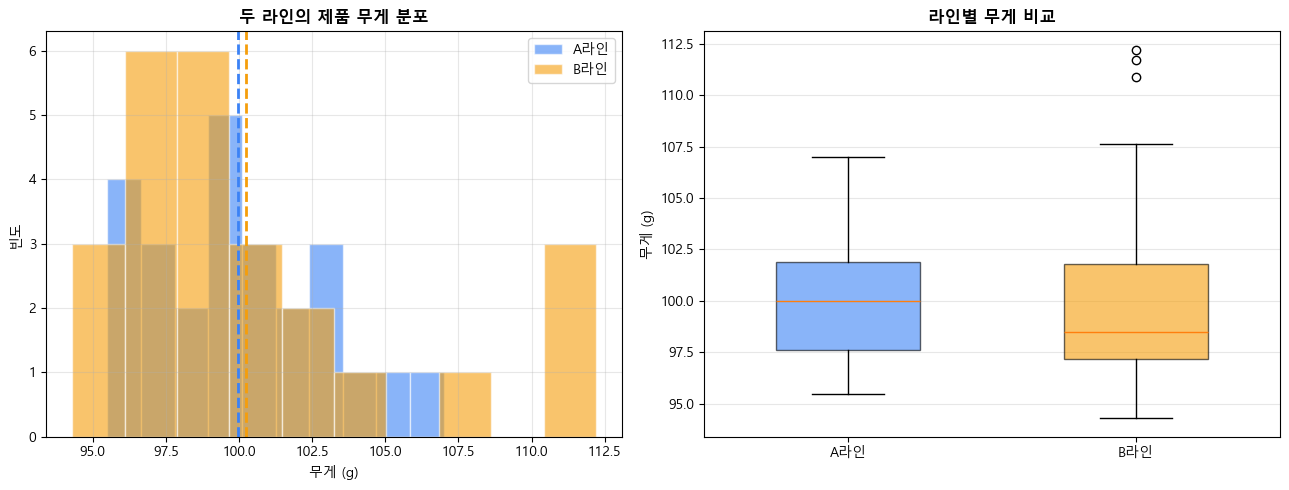

In [9]:
# 시각화: 두 라인 비교
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].hist(line_a, bins=10, alpha=0.6, color='#3B82F6', edgecolor='white', label='A라인')
axes[0].hist(line_b, bins=10, alpha=0.6, color='#F59E0B', edgecolor='white', label='B라인')
axes[0].axvline(np.mean(line_a), color='#3B82F6', linestyle='--', linewidth=2)
axes[0].axvline(np.mean(line_b), color='#F59E0B', linestyle='--', linewidth=2)
axes[0].set_xlabel('무게 (g)')
axes[0].set_ylabel('빈도')
axes[0].set_title('두 라인의 제품 무게 분포', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

bp = axes[1].boxplot([line_a, line_b], labels=['A라인', 'B라인'],
                      patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('#3B82F6')
bp['boxes'][0].set_alpha(0.6)
bp['boxes'][1].set_facecolor('#F59E0B')
bp['boxes'][1].set_alpha(0.6)
axes[1].set_ylabel('무게 (g)')
axes[1].set_title('라인별 무게 비교', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 문제 2-1: 가설 설정 및 가정 검정

**(a)** 분석 목표에 맞는 **귀무가설(H₀)**과 **대립가설(H₁)**을 설정하세요.

**(b)** **양측검정** 또는 **단측검정** 중 어떤 것이 적절한지 결정하고, 그 근거를 설명하세요.

**(c)** 각 라인의 정규성을 검정하세요.

**(d)** 두 라인의 Q-Q Plot을 나란히 그리세요.

**(e)** 정규성이 충족된다면, 등분산 검정도 수행하세요.

**(f)** 가정 검정 결과를 종합하여 어떤 검정을 사용할지 결정하세요.

의사결정 과정을 단계별로 설명하세요.

In [10]:
print("\n[문제 2-1] 가설 설정 및 가정 검정")
print("-" * 40)

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 두 생산라인(A, B)의 제품 무게에 통계적으로 유의한 차이가 없다.")
print(f"    H₁: 두 생산라인(A, B)의 제품 무게에 통계적으로 유의한 차이가 있다.")

# TODO (b): 양측/단측 결정
print(f"\n(b) 검정 방향:")
print(f"    선택: 양측검정")
print(f"    근거: 분석 목적이 두 생산라인(A, B)의 제품 무게의 차이가 통계적으로 유의한지")
print(f"        검증하고 싶은 것이기 때문이다.")

# TODO (c): 정규성 검정
stat_a, p_a = stats.shapiro(line_a)
stat_b, p_b = stats.shapiro(line_b)

print(f"\n(c) 정규성 검정:")
print(f"    A라인: W={stat_a:.4f}, p={p_a:.4f}이므로 정규성을 갖는다는 가정을 만족한다.")
print(f"    B라인: W={stat_b:.4f}, p={p_b:.4f}이므로 정규성을 갖는다는 가정을 만족하지 못한다.")



[문제 2-1] 가설 설정 및 가정 검정
----------------------------------------
(a) 가설 설정:
    H₀: 두 생산라인(A, B)의 제품 무게에 통계적으로 유의한 차이가 없다.
    H₁: 두 생산라인(A, B)의 제품 무게에 통계적으로 유의한 차이가 있다.

(b) 검정 방향:
    선택: 양측검정
    근거: 분석 목적이 두 생산라인(A, B)의 제품 무게의 차이가 통계적으로 유의한지
        검증하고 싶은 것이기 때문이다.

(c) 정규성 검정:
    A라인: W=0.9616, p=0.4471이므로 정규성을 갖는다는 가정을 만족한다.
    B라인: W=0.8349, p=0.0009이므로 정규성을 갖는다는 가정을 만족하지 못한다.


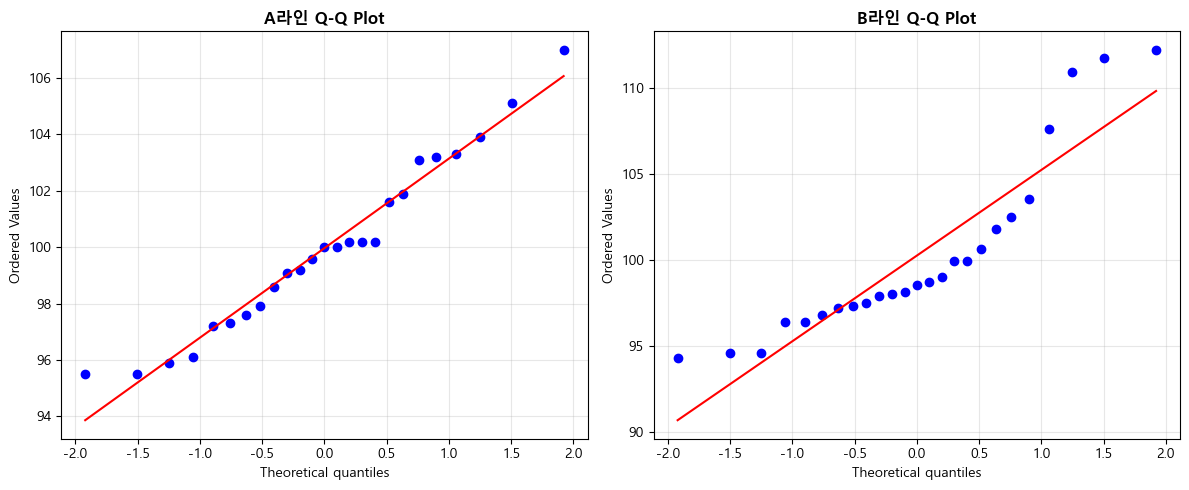

In [11]:
# TODO (d): Q-Q Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# TODO: 각 라인의 Q-Q Plot 그리기
# A라인
stats.probplot(line_a, dist='norm', plot=axes[0])
axes[0].set_title("A라인 Q-Q Plot", fontsize=12, fontweight="bold")
axes[0].grid(alpha=0.3)

# B라인
stats.probplot(line_b, dist='norm', plot=axes[1])
axes[1].set_title("B라인 Q-Q Plot", fontsize=12, fontweight="bold")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [12]:
# TODO (e): 등분산 검정 (정규성 충족 시)
lev_stat, lev_p = stats.levene(line_a, line_b)

print(f"(e) 등분산 검정:")
print(f"    F={lev_stat:.4f}, p={lev_p:.4f}")
print(f"    판정: 유의수준을 0.05라고 할 때, {'등분산성을 충족함' if lev_p >= 0.05 else '등분산성을 충족하지 않음'}")

# TODO (f): 검정 방법 결정
print(f"\n(f) 검정 방법 결정:")
print(f"    [1] 정규성 — A: 정규성을 충족함, B: 정규성을 충족하지 않음")
print(f"    [2] 등분산 — 든분산성을 충족함")
print(f"    [3] 결론 → 사용할 검정: Mann-Whitney U 검정")
print(f"        근거: 등분산성은 만족하지만, B라인은 정규성을 만족하지 않고 극단값도 갖고 있다.")
print(f"            따라서 분석 결과가 왜곡될 수 있으므로 이상치의 영향을 덜 받고, 데이터 분포의 영향을 덜 받는")
print(f"            비모수 검정법 중 하나인 Mann-Whitney U 검정을 사용하는 것이 적절하다고 생각한다.")


(e) 등분산 검정:
    F=1.6507, p=0.2050
    판정: 유의수준을 0.05라고 할 때, 등분산성을 충족함

(f) 검정 방법 결정:
    [1] 정규성 — A: 정규성을 충족함, B: 정규성을 충족하지 않음
    [2] 등분산 — 든분산성을 충족함
    [3] 결론 → 사용할 검정: Mann-Whitney U 검정
        근거: 등분산성은 만족하지만, B라인은 정규성을 만족하지 않고 극단값도 갖고 있다.
            따라서 분석 결과가 왜곡될 수 있으므로 이상치의 영향을 덜 받고, 데이터 분포의 영향을 덜 받는
            비모수 검정법 중 하나인 Mann-Whitney U 검정을 사용하는 것이 적절하다고 생각한다.


### 문제 2-2: 검정 수행 및 효과크기

**(a)** 2-1에서 결정한 검정을 수행하세요 (α = 0.05).

**(b)** 적절한 효과크기를 계산하세요.

> 모수 검정(t-검정)이면 Cohen's d를, 비모수 검정이면 rank-biserial r을 계산합니다.

**(c)** p-value와 효과크기를 종합하여 최종 결론을 작성하세요.

In [14]:
print("\n[문제 2-2] 검정 수행 및 효과크기")
print("-" * 40)

# TODO (a): Mann-Whitney U 검정 수행
ref_mw = pg.mwu(line_a, line_b)

#      U-val	alternative	  p-val	     RBC	CLES
# MWU	347.5	two-sided	0.503118	0.112	0.556

test_stat_2 = ref_mw['U-val'].values[0]
p_value_2 = ref_mw['p-val'].values[0]

print(f"(a) 검정 결과:")
print(f"    검정통계량: {test_stat_2}")
print(f"    p-value: {p_value_2:.4f}")
print(f"    판정 (α=0.05): 귀무가설인 '두 생산라인(A, B)의 제품 무게에 통계적으로 유의한 차이가 없다.'의 기각을 보류한다.")

# TODO (b): 효과크기
effect_size_2 = ref_mw['RBC'].values[0]

print(f"\n(b) 효과크기: {effect_size_2:.4f}")
print(f"    해석 (작은/중간/큰): 효과크기는 작은 편이다.")

# TODO (c): 종합 결론
print(f"\n(c) 종합 결론:")
print(f"     유의수준을 0.05라고 할 때, p-value가 {p_value_2:.4f}로 매우 크기 때문에 두 생산 라인에서 생산되는 제품의 무게에는 통계적으로 유의미한 차이가 없다.")
print(f"     또한, B라인에 포함된 극단치로 인해 비모수 검정을 수행해 확인해보니 효과크기가 {effect_size_2}로 작게 나타난 것을 통해 두 생산라인에서")
print(f"     만들어진 제품의 무게 분포에 큰 차이가 없다는 것을 알 수 있었다. 그러나 B 생산라인에서 다른 제품들에 비해 극단적인 데이터가 나왔으므로")
print(f"     B 생산라인을 점검할 필요가 있을 것으로 사료된다.")



[문제 2-2] 검정 수행 및 효과크기
----------------------------------------
(a) 검정 결과:
    검정통계량: 347.5
    p-value: 0.5031
    판정 (α=0.05): 귀무가설인 '두 생산라인(A, B)의 제품 무게에 통계적으로 유의한 차이가 없다.'의 기각을 보류한다.

(b) 효과크기: 0.1120
    해석 (작은/중간/큰): 효과크기는 작은 편이다.

(c) 종합 결론:
     유의수준을 0.05라고 할 때, p-value가 0.5031로 매우 크기 때문에 두 생산 라인에서 생산되는 제품의 무게에는 통계적으로 유의미한 차이가 없다.
     또한, B라인에 포함된 극단치로 인해 비모수 검정을 수행해 확인해보니 효과크기가 0.11199999999999999로 작게 나타난 것을 통해 두 생산라인에서
     만들어진 제품의 무게 분포에 큰 차이가 없다는 것을 알 수 있었다. 그러나 B 생산라인에서 다른 제품들에 비해 극단적인 데이터가 나왔으므로
     B 생산라인을 점검할 필요가 있을 것으로 사료된다.


### 문제 2-3: 모수 vs 비모수 — 왜 가정 검정이 중요한가?

**(a)** 같은 데이터에 대해 Welch's t-검정과 Mann-Whitney U 검정을 **모두** 수행하고 결과를 비교하세요.

**(b)** 두 검정의 결론이 다르다면, 어떤 검정의 결과를 더 신뢰해야 하는지 B라인의 분포 특성과 연결하여 설명하세요.

**(c)** "표본이 크면 t-검정을 써도 괜찮다"는 주장에 대해,

이 데이터의 B라인처럼 이상치가 포함된 경우에도 성립하는지 의견을 작성하세요.

In [ ]:
print("\n[문제 2-3] 모수 vs 비모수 비교")
print("-" * 40)

# TODO (a): 두 검정 비교
#  Welch's t-test
t_stat_comp, p_t_comp = stats.ttest_ind(line_a, line_b, equal_var=False)

# Mann-Whitney U 검정
ref_mw = pg.mwu(line_a, line_b)

u_stat_comp = ref_mw['U-val'].values[0]
p_u_comp = ref_mw['p-val'].values[0]

print(f"(a) 검정 결과 비교:")
print(f"    Welch's t: t={t_stat_comp:.4f}, p={p_t_comp:.4f}")
print(f"    Mann-Whitney U: U={u_stat_comp:.2f}, p={p_u_comp:.4f}")
print(f"    Mann-Whitney U 검정을 사용했을 때, Welch's t 검정보다 p-value가 더 낮다는 것을 알 수 있다.")

# TODO (b): 해석
print(f"\n(b) 어떤 검정을 더 신뢰해야 하나요?")
print(f"    답: Mann-Whitney U 검정")
print(f"    이유: B 라인에 존재하는 극단값으로 인해 B 라인에서 생상된 제품 무게의 표준편차가 커지는 효과를 얻게 되는데,")
print(f"         t-검정을 수행하면 이로 인한 영향을 강하게 받아 t값과 p-value가 왜곡될 수 있기 때문이다.")

# TODO (c): CLT와 이상치
print(f"\n(c) 이상치가 있을 때 t-검정의 한계:")
print(f"    중심극한정리는 표본평균의 정규성을 주장할 뿐, 이상치로 인해 표본평균이 왜곡되는 문제를 해결하지 못한다.")
print(f"    또한, 이상치로 인해 전체 데이터의 분산이 왜곡될 수 있다. 이는 결국 t-검정의 검정력을 낮추는 요인이라고 생각한다.")
print(f"    따라서 표본의 크기보다 분석에 사용되는 데이터의 분포에 따라 그에 맞는 검정법을 사용하는 것이 적절하다고 생각한다.")



[문제 2-3] 모수 vs 비모수 비교
----------------------------------------
(a) 검정 결과 비교:
    Welch's t: t=-0.2217, p=0.8257
    Mann-Whitney U: U=347.50, p=0.5031
    ----

(b) 어떤 검정을 더 신뢰해야 하나요?
    답: Mann-Whitney U 검정
    이유: B 라인에 존재하는 극단값으로 인해 B 라인에서 생상된 제품 무게의 표준편차가 커지는 효과를 얻게 되는데,
         t-검정을 수행하면 이로 인한 영향을 강하게 받아 t값과 p-value가 왜곡될 수 있기 때문이다.

(c) 이상치가 있을 때 t-검정의 한계:
    중심극한정리는 표본평균의 정규성을 주장할 뿐, 이상치로 인해 표본평균이 왜곡되는 문제를 해결하지 못한다.
    또한, 이상치로 인해 전체 데이터의 분산이 왜곡될 수 있다. 이는 결국 t-검정의 검정력을 낮추는 요인이라고 생각한다.
    따라서 표본의 크기보다 분석에 사용되는 데이터의 분포에 따라 그에 맞는 검정법을 사용하는 것이 적절하다고 생각한다.


---

## 문제 3: 요일별 고객 방문 패턴 분석

한 음식점 사장이 "요일에 따라 방문 고객 수가 다르지 않다"고 주장합니다.

한 주간 방문 고객 수를 조사하여 이 주장을 검증합니다.

총 **420명**의 고객이 방문했습니다.

**분석 목표**: 요일별 고객 방문 비율이 균등(각 1/7)한지 검정합니다.

**주어진 데이터:**

In [16]:
print("\n[문제 3] 요일별 고객 방문 패턴 분석")
print("=" * 50)

np.random.seed(503)
days = ['월', '화', '수', '목', '금', '토', '일']
true_probs = [0.10, 0.10, 0.12, 0.12, 0.16, 0.22, 0.18]
visits = np.random.choice(days, size=420, p=true_probs)
observed_visits = np.array([np.sum(visits == d) for d in days])

print(f"요일별 방문 고객 수 (총 {observed_visits.sum()}명):")
df_visits = pd.DataFrame({'요일': days, '관측 빈도': observed_visits})
display(df_visits)



[문제 3] 요일별 고객 방문 패턴 분석
요일별 방문 고객 수 (총 420명):


,요일,관측 빈도
0,월,50
1,화,43
2,수,40
3,목,54
4,금,69
5,토,89
6,일,75


### 문제 3-1: 가설 설정 및 적합도 검정

**(a)** 분석 목표에 맞는 **귀무가설(H₀)** 과 **대립가설(H₁)** 을 설정하세요.

> 카이제곱 검정은 "차이가 존재하는가?"를 판정하므로 양측/단측 개념이 적용되지 않습니다.

**(b)** 기대빈도를 계산하고, Cochran's rule을 확인하세요.

기대빈도 < 5인 셀이 전체의 20%를 초과하거나 기대빈도 < 1인 셀이 있는지 점검하세요.

**(c)** 적합도 검정을 수행하세요 (α = 0.05).

**(d)** 결론을 내리세요.

In [17]:
print("\n[문제 3-1] 가설 설정 및 적합도 검정")
print("-" * 40)

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 요일별 고객 방문 비율은 균등하다.")
print(f"    H₁: 요일별 고객 방문 비율은 균등하지 않다.")

# TODO (b): 기대빈도 + Cochran's rule 확인
n_total_visits = observed_visits.sum()
expected_visits = n_total_visits / len(days)  # 균등 분포 가정 하의 기대빈도

print(f"\n(b) 기대빈도: {expected_visits}")
# Cochran's rule 점검
# 충족 

# TODO (c): 적합도 검정
chi2_visits, p_visits = stats.chisquare(f_obs=observed_visits, f_exp=expected_visits)

print(f"\n(c) 적합도 검정:")
print(f"    χ² = {chi2_visits:.4f}")
print(f"    자유도 (df) = {len(days) - 1}")
print(f"    p-value = {p_visits:.6f}")

# TODO (d): 결론
print(f"\n(d) 결론 (α=0.05):")

alpha = 0.05
if p_visits < alpha:
    print(f"    귀무가설 기각 -> 요일별 고객 방문 비율은 균등하지 않다.")
else:    
    print(f"    귀무가설 기각 보류 -> 요일별 고객 방문 비율은 균등하다.")


[문제 3-1] 가설 설정 및 적합도 검정
----------------------------------------
(a) 가설 설정:
    H₀: 요일별 고객 방문 비율은 균등하다.
    H₁: 요일별 고객 방문 비율은 균등하지 않다.

(b) 기대빈도: 60.0

(c) 적합도 검정:
    χ² = 32.8667
    자유도 (df) = 6
    p-value = 0.000011

(d) 결론 (α=0.05):
    귀무가설 기각 -> 요일별 고객 방문 비율은 균등하지 않다.


### 문제 3-2: 효과크기와 사후분석 (잔차 분석)

**(a)** 효과크기(Cohen's w)를 계산하고 해석하세요.

**(b)** 표준화 잔차를 계산하세요.

**각 요일**에 대해 잔차 값과 방향(기대보다 많음/적음)을 보고하세요.

> 표준화 잔차 = (O − E) / √E

**(c)** |잔차| > 2인 요일을 찾고, 이 요일들이 왜 기대와 다른지 실생활 관점에서 해석하세요.

**(d)** 관측 빈도와 기대 빈도를 비교하는 막대 그래프를 그리세요.

In [18]:
print("\n[문제 3-2] 효과크기와 사후분석")
print("-" * 40)

# TODO (a): Cohen's w
cohens_w_visits = np.sqrt(chi2_visits / n_total_visits)

print(f"(a) Cohen's w = {cohens_w_visits}")
print(f"    해석: 효과크기가 약 0.28로 중간보다는 살짝 작은 효과가 있다는 것을 알 수 있다.")

# TODO (b): 표준화 잔차
std_residuals = (observed_visits - expected_visits) / np.sqrt(expected_visits)
print(f"\n(b) 사후분석 — 표준화 잔차: {std_residuals}") 

# TODO (c): 해석
print(f"\n(c) |잔차| > 2인 요일 해석:")
for day, i in zip(days, std_residuals):
    if abs(i) > 2:
        print(f"    {day}요일은 기대빈도와 다르다. (잔차: {i:.3f})")
    else:
        print(f"    {day}요일은 기대빈도와 비슷하다. (잔차: {i:.3f})")       



[문제 3-2] 효과크기와 사후분석
----------------------------------------
(a) Cohen's w = 0.279739107480467
    해석: 효과크기가 약 0.28로 중간보다는 살짝 작은 효과가 있다는 것을 알 수 있다.

(b) 사후분석 — 표준화 잔차: [-1.29099445 -2.19469056 -2.5819889  -0.77459667  1.161895    3.7438839
  1.93649167]

(c) |잔차| > 2인 요일 해석:
    월요일은 기대빈도와 비슷하다. (잔차: -1.291)
    화요일은 기대빈도와 다르다. (잔차: -2.195)
    수요일은 기대빈도와 다르다. (잔차: -2.582)
    목요일은 기대빈도와 비슷하다. (잔차: -0.775)
    금요일은 기대빈도와 비슷하다. (잔차: 1.162)
    토요일은 기대빈도와 다르다. (잔차: 3.744)
    일요일은 기대빈도와 비슷하다. (잔차: 1.936)


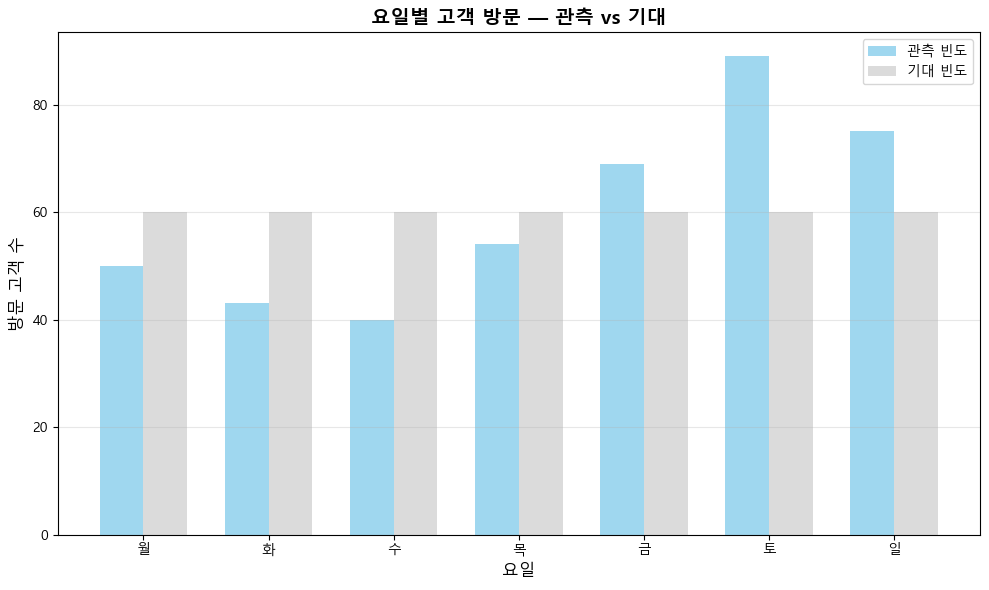

In [19]:
# TODO (d): 관측 vs 기대 빈도 막대 그래프
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(days))
width = 0.35

# TODO: 관측/기대 빈도 나란히 막대 그래프

#실제 방문객
ax.bar(x-width/2, observed_visits, width, label='관측 빈도', color='skyblue', alpha=0.8)

#기대 방문객
ax.bar(x+width/2, [expected_visits]*len(days), width, label='기대 빈도', color='lightgrey', alpha=0.8)

ax.set_xlabel('요일', fontsize=12)
ax.set_ylabel('방문 고객 수', fontsize=12)
ax.set_title('요일별 고객 방문 — 관측 vs 기대', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(days)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 문제 3-3: 소규모 카페 음료 선호도

위와 별개 상황입니다. 한 소규모 카페에서 5가지 음료의 선호도가 균등한지 조사했습니다.

총 **22명**의 고객이 응답했습니다.

**분석 목표**: 5가지 음료의 선호도가 균등(각 1/5)한지 검정합니다.

**주어진 데이터:**

In [20]:
print("\n[문제 3-3] 소규모 카페 음료 선호도")
print("-" * 40)

menu = ['아메리카노', '라떼', '카푸치노', '스무디', '에이드']
observed_small = np.array([8, 5, 4, 3, 2])
n_total_small = observed_small.sum()

print(f"음료별 선호 고객 수 (총 {n_total_small}명):")
df_small = pd.DataFrame({'음료': menu, '관측 빈도': observed_small})
display(df_small)



[문제 3-3] 소규모 카페 음료 선호도
----------------------------------------
음료별 선호 고객 수 (총 22명):


,음료,관측 빈도
0,아메리카노,8
1,라떼,5
2,카푸치노,4
3,스무디,3
4,에이드,2


**(a)** 가설을 설정하세요.

**(b)** 균등 분포를 가정할 때 기대빈도를 계산하고, Cochran's rule을 점검하세요. 조건이 충족되나요?

**(c)** Cochran's rule이 위반되면, 사용할 수 있는 대안 방법은 무엇인가요?
  - 범주 병합과 Monte Carlo 시뮬레이션 중 어떤 것이 이 상황에 더 적절한지 설명하세요.

**(d)** 선택한 대안 방법을 적용하여 검정을 수행하세요.

**(e)** 효과크기(Cohen's w)를 계산하고 해석하세요.

In [21]:
# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 5가지 음료의 선호도는 균등하다.")
print(f"    H₁: 5가지 음료의 선호도는 균등하지 않다.")

# TODO (b): 기대빈도 + Cochran's rule
expected_small = n_total_small / len(menu)  # 균등 분포: n_total / 5
expected_small_real = np.array([expected_small]*5)

print(f"\n(b) 기대빈도: {expected_small}") # 4.4

under5_cells_cnt = np.sum(expected_small_real < 5)
pct_under5_cells = (under5_cells_cnt / len(menu)) *100

print(f"    기대빈도 < 5인 셀: {under5_cells_cnt}개 ({pct_under5_cells}%)")
print(f"    Cochran's rule: {'기대빈도가 5 미만인 셀이 20%를 초과하여 존재해 위배됨' if pct_under5_cells > 20 else '충족함'}")

# TODO (c): 대안 방법 선택
print(f"\n(c) 대안 방법:")
print(f"      카이제곱 검정이 불가능하고, 범주를 병합하면 분석의 의미가 사라지므로 Monte Carlo 시뮬레이션을 적용할 것이다.")

# TODO (d): 검정 수행 (선택한 대안) -> Monte Carlo 시뮬레이션

# 카이제곱 검정(참고용)
chi2_small_1, p_small = stats.chisquare(observed_small, expected_small_real)

# print(ch2_small) -> 4.81
# print(p_small) -> 0.306 -> 균일분포와 같을 것이다

n_simulation = 100_000 #십만번 반복
count_extreme = 0 #극단값의 개수

# 귀무가설 하에서 각각의 메뉴를 선택할 확률 -> 1/5
expected_prob = [1/len(menu)] * len(menu)

for i in range(n_simulation):
    # 귀무가설이 참이라는 가정 하에 만든 샘플
    sample = np.random.multinomial(n_total_small, expected_prob)
    
    # 시뮬레이션 데이터의 카이제곱 통계량
    chi2_small_2 = np.sum((sample - expected_small_real)**2 / expected_small_real).round(5) 
    if chi2_small_2 > chi2_small_1:
        count_extreme += 1
    
    
p_alternative = count_extreme / n_simulation

print(f"\n(d) 검정 결과:")
print(f"    p-value: {p_alternative}")
print(f"    판정 (α=0.05): 귀무가설 기각을 보류한다. 즉, 5가지 음료의 선호도는 균등하다.")

# TODO (e): 효과크기
cohens_w_small = np.sqrt(chi2_small_1 / n_total_small)

print(f"\n(e) Cohen's w = {cohens_w_small}")
print(f"    해석: 이는 {'작은' if cohens_w_small < 0.3 else '중간' if cohens_w_small < 0.5 else '큰'}효과이다.")
print(f"         효과크기가 약 0.468로, 중간보다는 큰 효과이다.")



(a) 가설 설정:
    H₀: 5가지 음료의 선호도는 균등하다.
    H₁: 5가지 음료의 선호도는 균등하지 않다.

(b) 기대빈도: 4.4
    기대빈도 < 5인 셀: 5개 (100.0%)
    Cochran's rule: 기대빈도가 5 미만인 셀이 20%를 초과하여 존재해 위배됨

(c) 대안 방법:
      카이제곱 검정이 불가능하고, 범주를 병합하면 분석의 의미가 사라지므로 Monte Carlo 시뮬레이션을 적용할 것이다.

(d) 검정 결과:
    p-value: 0.27128
    판정 (α=0.05): 귀무가설 기각을 보류한다. 즉, 5가지 음료의 선호도는 균등하다.

(e) Cohen's w = 0.4679831882266818
    해석: 이는 중간효과이다.
         효과크기가 약 0.468로, 중간보다는 큰 효과이다.


---

## 문제 4: 연령대별 운동 선호도 조사

헬스장에서 연령대(20대/30대/40대)에 따라 선호하는 운동 종류(헬스/요가/수영)가 다른지 조사합니다.

총 **180명**을 대상으로 설문을 실시했습니다.

**분석 목표**: 연령대에 따라 선호하는 운동 종류에 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [60]:
print("\n[문제 4] 연령대별 운동 선호도 조사")
print("=" * 50)

np.random.seed(504)
n_survey = 180

ages = np.random.choice(['20대', '30대', '40대'], size=n_survey, p=[0.35, 0.35, 0.30])

exercise_prefs = []
for age in ages:
    if age == '20대':
        exercise_prefs.append(np.random.choice(['헬스', '요가', '수영'], p=[0.50, 0.20, 0.30]))
    elif age == '30대':
        exercise_prefs.append(np.random.choice(['헬스', '요가', '수영'], p=[0.30, 0.40, 0.30]))
    else:
        exercise_prefs.append(np.random.choice(['헬스', '요가', '수영'], p=[0.20, 0.35, 0.45]))
exercise_prefs = np.array(exercise_prefs)

df_survey = pd.DataFrame({'연령대': ages, '운동': exercise_prefs})

ct_exercise = pd.crosstab(df_survey['연령대'], df_survey['운동'],
                            margins=True, margins_name='합계')
print("\n교차표:")
display(ct_exercise)



[문제 4] 연령대별 운동 선호도 조사

교차표:


운동,수영,요가,헬스,합계
연령대,,,,
20대,18,19,29,66
30대,19,22,19,60
40대,29,16,9,54
합계,66,57,57,180


### 문제 4-1: 가설 설정 및 독립성 검정

**(a)** 분석 목표에 맞는 **귀무가설(H₀)** 과 **대립가설(H₁)** 을 설정하세요.

**(b)** 기대빈도를 계산하고 표로 출력하세요.

  - Cochran's rule(기대빈도 < 5인 셀이 20% 이하, 기대빈도 < 1인 셀이 0개)을 점검하세요.

**(c)** 조건 충족 여부에 따라 적절한 검정을 수행하세요 (α = 0.05).

**(d)** 결론을 내리세요.

In [62]:
print("\n[문제 4-1] 가설 설정 및 독립성 검정")
print("-" * 40)

ct_raw_ex = pd.crosstab(df_survey['연령대'], df_survey['운동'])

# display(ct_raw_ex)
# 운동	수영   요가  헬스
#연령대			
#20대	18	  19	29
#30대	19	  22	19
#40대	29	  16	 9


# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 연령대와 선호하는 운동 종류에는 유의한 차이가 없다.")
print(f"    H₁: 연령대와 선호하는 운동 종류에는 유의한 차이가 있다.")

# TODO (b): 기대빈도 + Cochran's rule
chi2_stats = stats.chi2_contingency(ct_raw_ex)

# print(chi2_stats)
# statistic=13.965516408100141 -- 카이제곱 통계량
# pvalue=0.0074059302638624525 --  p-value
# dof=4 -- Degrees of Freedom
# expected_freq=array([[24.2, 20.9, 20.9], [22. , 19. , 19. ], [19.8, 17.1, 17.1]])) -- 기대빈도

chi2_ex, p_ex, dof_ex, expected_ex = chi2_stats

# 기대빈도가 array 형태이므로 DataFrame 형태로 변경
# .index와 .columns를 쓰면 기존에 만든 데이터프레임의 행/열 이름을 그대로 쓸 수 있음
expected_ex_df = pd.DataFrame(
    expected_ex,
    index=ct_raw_ex.index,
    columns=ct_raw_ex.columns
)

print(f"\n(b) 기대빈도:")
display(expected_ex_df)

# Cochran's rule 점검
under5_cells_cnt = (expected_ex_df < 5).sum().sum() # 0
under1_cells_cnt = (expected_ex_df < 1).sum().sum() # 0
total_cells_cnt = expected_ex_df.size # 9
under5_cells_pct = (under5_cells_cnt / total_cells_cnt)*100

print(f"\nCochran's rule 점검 결과")
print(f"  기대빈도가 5보다 낮은 셀이 전체의 {under5_cells_pct}% 이고, 기대빈도가 1보다 낮은 셀은 {under1_cells_cnt}개이다.")
print(f"  따라서 Cochran's rule을 {'만족한다.' if (under5_cells_pct <= 20 and under1_cells_cnt == 0) else '만족하지 않는다.'}")

# TODO (c): 검정 수행
print(f"\n(c) 독립성 검정:")
print(f"    χ² = {chi2_ex:.4f}")
print(f"    자유도 (df) = {dof_ex}")
print(f"    p-value = {p_ex:.5f}")

# TODO (d): 결론
print(f"\n(d) 결론 (α=0.05):")
alpha = 0.05
if p_ex < 0.05:
    print('   p-value가 유의수준보다 낮으므로 연령대와 선호하는 운동 종류에는 유의한 차이가 없다는 귀무가설을 기각한다.')
    print('   따라서 연령대와 선호하는 운동 종류에는 통계적으로 유의미한 차이가 있다.')
else:
    print('   p-value가 유의수준보다 낮으므로 연령대와 선호하는 운동 종류에는 유의한 차이가 없다는 귀무가설의 기각을 보류한다.')
    print('   따라서 연령대와 선호하는 운동 종류에는 통계적으로 유의미한 차이가 있다고 보기 어렵다.')


[문제 4-1] 가설 설정 및 독립성 검정
----------------------------------------
(a) 가설 설정:
    H₀: 연령대와 선호하는 운동 종류에는 유의한 차이가 없다.
    H₁: 연령대와 선호하는 운동 종류에는 유의한 차이가 있다.

(b) 기대빈도:


운동,수영,요가,헬스
연령대,,,
20대,24.2,20.9,20.9
30대,22.0,19.0,19.0
40대,19.8,17.1,17.1



Cochran's rule 점검 결과
  기대빈도가 5보다 낮은 셀이 전체의 0.0% 이고, 기대빈도가 1보다 낮은 셀은 0개이다.
  따라서 Cochran's rule을 만족한다.

(c) 독립성 검정:
    χ² = 13.9655
    자유도 (df) = 4
    p-value = 0.00741

(d) 결론 (α=0.05):
   p-value가 유의수준보다 낮으므로 연령대와 선호하는 운동 종류에는 유의한 차이가 없다는 귀무가설을 기각한다.
   따라서 연령대와 선호하는 운동 종류에는 통계적으로 유의미한 차이가 있다.


### 문제 4-2: 효과크기와 사후분석 (조정된 잔차)

**(a)** Cramér's V를 계산하고 해석하세요.

df* = min(r−1, c−1)에 따른 해석 기준을 적용하세요.

**(b)** 조정된 잔차(표준화 잔차)를 구하고 표로 출력하세요.

**(c)** 각 셀이 의미하는 바를 구체적으로 해석하세요.
> 예: "20대 × 헬스: 잔차 = +2.5 → 20대는 기대보다 헬스를 더 많이 선호합니다"

**(d)** 관측 빈도와 기대 빈도를 비교하는 히트맵을 나란히 그리세요.

In [64]:
print("\n[문제 4-2] 효과크기와 사후분석")
print("-" * 40)

# TODO (a): Cramér's V
r_ex, c_ex = ct_raw_ex.shape
df_star_ex = min(r_ex - 1, c_ex - 1)

from scipy.stats.contingency import association 

# cramer's 효과크기 계산
cramers_v_ex = association(ct_raw_ex, method='cramer')

print(f"(a) Cramér's V = {cramers_v_ex:.3f}")
print(f"    df* = {df_star_ex}")

# Cramér's V 해석 기준 (df*에 따라 계산)
if cramers_v_ex < (0.1 / np.sqrt(df_star_ex)):
    answer = '효과크기는 매우 작은 편이다.'
elif cramers_v_ex < (0.3 / np.sqrt(df_star_ex)):
    answer = '효과크기는 작은 편이다.'
elif cramers_v_ex < (0.5 / np.sqrt(df_star_ex)):
    answer = '효과크기는 중간인 편이다.'
elif cramers_v_ex >= (0.5 / np.sqrt(df_star_ex)):
    answer = '효과크기는 큰 편이다.'            

print(f"    해석: df*의 값이 {df_star_ex}이므로, cramer's 효과크기가 {cramers_v_ex:.3f}라면 {answer}")

# TODO (b): 조정된 잔차
# 조정된 잔차를 계산하여 DataFrame으로 만드세요
from statsmodels.stats.contingency_tables import Table

print(f"\n(b) 조정된 잔차:")

table = Table(ct_raw_ex)
std_res_ex = pd.DataFrame(table.standardized_resids, index=ct_raw_ex.index, columns=ct_raw_ex.columns)
display(std_res_ex)

# TODO (c): |잔차| > 2인 셀 해석
print(f"\n(c) |잔차| > 2인 셀:")

# 이중반복문으로 행/열별로 잔차 데이터 비교하기
for age in std_res_ex.index: # 나이대별로 진행
    for exercise in std_res_ex.columns: # 나이대+운동별로 진행
        residual = std_res_ex.loc[age, exercise]
        
        if abs(residual) > 2:
            direction = '기대빈도보다 유의하게 많이' if residual > 0 else '기대빈도보다 유의하게 적게'
            print(f"   {age} x {exercise}의 잔차는 {residual:.3f} -> 이 그룹은 해당 운동을 {direction} 선호하는 경향을 보입니다.")
        else:
            print(f"   {age} x {exercise}의 잔차는 {residual:.3f} -> 기대빈도와 관측빈도에서 유의미한 차이가 발견되지 않았습니다.")    


[문제 4-2] 효과크기와 사후분석
----------------------------------------
(a) Cramér's V = 0.197
    df* = 2
    해석: df*의 값이 2이므로, cramer's 효과크기가 0.197라면 효과크기는 작은 편이다.

(b) 조정된 잔차:


운동,수영,요가,헬스
연령대,,,
20대,-1.989994,-0.631754,2.693267e+00
30대,-0.984327,1.019703,1.207571e-15
40대,3.105203,-0.384618,-2.832185e+00



(c) |잔차| > 2인 셀:
   20대 x 수영의 잔차는 -1.990 -> 기대빈도와 관측빈도에서 유의미한 차이가 발견되지 않았습니다.
   20대 x 요가의 잔차는 -0.632 -> 기대빈도와 관측빈도에서 유의미한 차이가 발견되지 않았습니다.
   20대 x 헬스의 잔차는 2.693 -> 이 그룹은 해당 운동을 기대빈도보다 유의하게 많이 선호하는 경향을 보입니다.
   30대 x 수영의 잔차는 -0.984 -> 기대빈도와 관측빈도에서 유의미한 차이가 발견되지 않았습니다.
   30대 x 요가의 잔차는 1.020 -> 기대빈도와 관측빈도에서 유의미한 차이가 발견되지 않았습니다.
   30대 x 헬스의 잔차는 0.000 -> 기대빈도와 관측빈도에서 유의미한 차이가 발견되지 않았습니다.
   40대 x 수영의 잔차는 3.105 -> 이 그룹은 해당 운동을 기대빈도보다 유의하게 많이 선호하는 경향을 보입니다.
   40대 x 요가의 잔차는 -0.385 -> 기대빈도와 관측빈도에서 유의미한 차이가 발견되지 않았습니다.
   40대 x 헬스의 잔차는 -2.832 -> 이 그룹은 해당 운동을 기대빈도보다 유의하게 적게 선호하는 경향을 보입니다.


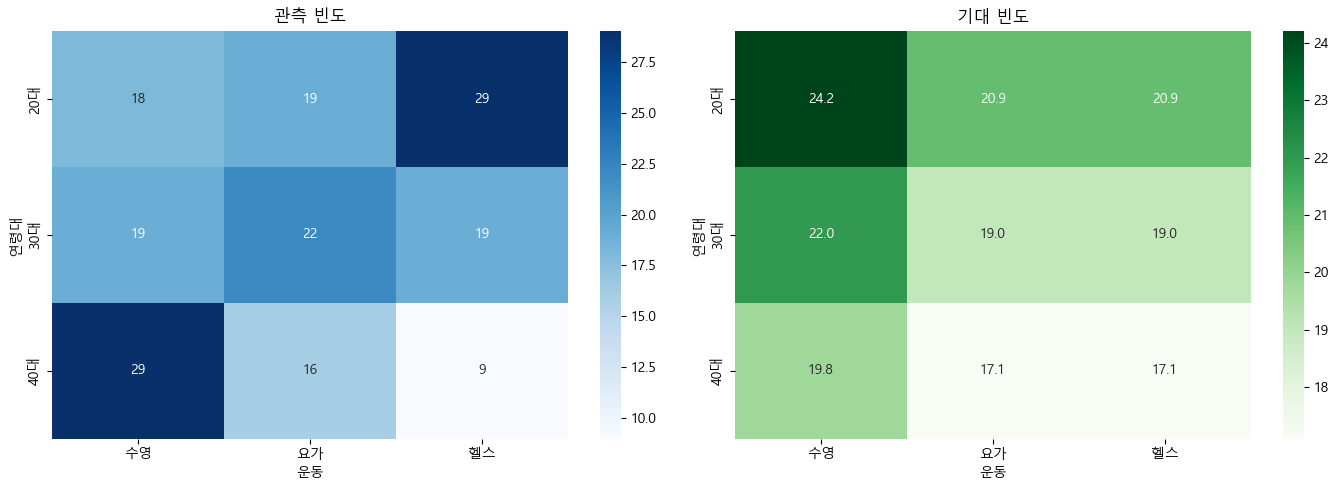

In [65]:
import seaborn as sns

# TODO (d): 히트맵 시각화 (관측 빈도 vs 기대 빈도)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# TODO: 관측 빈도 히트맵
sns.heatmap(
    ct_raw_ex,
    annot=True, #각 셀마다 관측빈도 값을 작성하려고 작성함
    fmt = 'd', # 각 셀마다 작성하는 값은 정수 형태로 넣을 것임
    cmap='Blues', # 각 셀마다 색칠한 색상
    ax=axes[0]
)
axes[0].set_title('관측 빈도')

# TODO: 기대 빈도 히트맵
sns.heatmap(
    expected_ex_df,
    annot=True,
    fmt = '.1f', # 각 셀마다 작성하는 값은 소수점 아래 첫째자리까지 나타낸 형태로 넣을 것임
    cmap='Greens',
    ax=axes[1]
)
axes[1].set_title('기대 빈도')

plt.tight_layout()
plt.show()

### 문제 4-3: 면접 방식별 합격률

위 데이터와 별개로, 한 중소기업 인사팀에서 **면접 방식**(대면/화상)에 따라

최종 합격률이 다른지 파악하려 합니다.

소규모 채용 회차로 총 **20명**의 지원자 데이터입니다.

**분석 목표**: 면접 방식(대면/화상)에 따라 최종 합격률에 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [66]:
print("\n[문제 4-3] 면접 방식별 합격률")
print("-" * 40)

# 2×2 교차표
#              합격    불합격
# 대면 면접     7       3      = 10
# 화상 면접     2       8      = 10
#               9      11      = 20
data_fisher_q4 = np.array([[7, 3],
                             [2, 8]])

ct_fisher_q4 = pd.DataFrame(data_fisher_q4,
                              index=['대면 면접', '화상 면접'],
                              columns=['합격', '불합격'])
ct_display_q4 = ct_fisher_q4.copy()
ct_display_q4['합계'] = ct_display_q4.sum(axis=1)
ct_display_q4.loc['합계'] = ct_display_q4.sum()
print("교차표:")
display(ct_display_q4)



[문제 4-3] 면접 방식별 합격률
----------------------------------------
교차표:


,합격,불합격,합계
대면 면접,7,3,10
화상 면접,2,8,10
합계,9,11,20


**(a)** **귀무가설(H₀)** 과 **대립가설(H₁)** 을 설정하세요.

**(b)** **양측검정** 또는 **단측검정** 중 어떤 것이 적절한지 결정하고, 그 근거를 설명하세요.

> Fisher 정확검정에서는 양측/단측 선택이 결과에 직접 영향을 줍니다.

**(c)** 기대빈도를 계산하고 Cochran's rule을 점검하세요.

카이제곱 검정을 적용할 수 있는지 판단하세요.

**(d)** 적절한 검정을 선택하여 수행하세요 (α = 0.05).

왜 이 검정을 선택했는지 이유를 설명하세요.

**(e)** 오즈비(OR)를 구하고 해석하세요.

> 오즈(Odds) = 해당 사건 / 반대 사건 \
> 오즈비(OR) = 한 집단의 오즈 / 다른 집단의 오즈 \
> 예: 대면 면접의 합격 오즈 = 합격 / 불합격

**(f)** 효과크기 φ(Phi) 계수를 계산하고 해석하세요.

In [78]:
# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 면접 방식(대면/화상)에 따른 최종 합격률에는 통계적으로 유의한 차이가 없다.")
print(f"    H₁: 면접 방식(대면/화상)에 따른 최종 합격률에는 통계적으로 유의한 차이가 있다.")
print('-'*30)

# TODO (b): 양측/단측 결정
print(f"\n(b) 검정 방향:")
print(f"    선택: 양측검정")
print(f"    근거: 면접 방식에 따른 최종 합격률의 차이 유무를 확인하고자 하는 것이고,")
print(f"         특정 면접 방식에 따른 최종 합격률이 더 높을 것이라는 가정을 하지 않기 위함이다.")
print('-'*30)

# TODO (c): 기대빈도 + Cochran's rule
chi2_q4, p_chi2_q4, dof_q4, expected_q4 = stats.chi2_contingency(ct_fisher_q4)

expected_q4_df = pd.DataFrame(
    expected_q4,
    index=ct_fisher_q4.index,
    columns=ct_fisher_q4.columns

)

print(f"\n(c) 기대빈도:")
display(expected_q4_df)
print('-'*30)

print(f"    Cochran's rule:")
under5_cells_cnt = (expected_q4_df < 5).sum().sum()
under1_cells_cnt = (expected_q4_df < 1).sum().sum()
total_cells_cnt = expected_q4_df.size
under5_cells_pct = (under5_cells_cnt / total_cells_cnt)*100

print(f"  기대빈도가 5보다 낮은 셀이 전체의 {under5_cells_pct}% 이고, 기대빈도가 1보다 낮은 셀은 {under1_cells_cnt}개이다.")
print(f"  따라서 Cochran's rule을 {'만족한다.' if (under5_cells_pct <= 20 and under1_cells_cnt == 0) else '만족하지 않는다.'}")
print('-'*30)

print(f"    카이제곱 적용 가능 여부: 카이제곱 적용은 부적합하다.")
if under5_cells_pct > 20 or under1_cells_cnt > 0:
    answer = "Cochran's rule를 만족하지 않아 카이제곱 검정 시 결과의 신뢰도가 낮기 때문이다."
else:
    answer = "Cochran's rule를 만족한다."    

print(f"    이유: 기대빈도가 5미만인 셀이 전체의 {under5_cells_pct:.1f}%이고, 기대빈도가 1보다 낮은 셀은 {under1_cells_cnt}개이므로 {answer}")

# TODO (d): Fisher 정확검정 수행
odds_ratio_q4, fisher_p_q4 = stats.fisher_exact(ct_fisher_q4)

print(f"\n(d) Fisher 정확검정 결과:")
print(f"    p-value = {fisher_p_q4:.4f}")

alpha = 0.05
if fisher_p_q4 < alpha:
    result_txt = f'p-value가 유의수준인 {alpha}보다 작으므로 면접 방식(대면/화상)에 따른 최종 합격률에는 통계적으로 유의한 차이가 없다는 귀무가설을 기각한다.'
else:
    result_txt = f'p-value가 유의수준인 {alpha}보다 크므로 면접 방식(대면/화상)에 따른 최종 합격률에는 통계적으로 유의한 차이가 없다는 귀무가설의 기각을 보류한다.'   
    
print(f"    판정 (α=0.05): {result_txt}")
print(f"    Fisher 정확검정 선택 이유: 표본의 크기가 20개로 작은 편이며, 기대빈도가 5 미만인 셀이 전체 셀의 50%에 달해")
print(f"                            카이제곱 검정의 가정을 위반하기 때문에 소표본에 적합한 Fisher 정확검정을 수행했다.")

# TODO (e): 오즈비 해석
print(f"\n(e) 오즈비 해석")
print(f"    오즈비(OR): {odds_ratio_q4:.3f}")

face_test_odds = ct_fisher_q4.loc['대면 면접', '합격'] / ct_fisher_q4.loc['대면 면접', '불합격'] #대면면접의 합격 odds
tel_test_odds = ct_fisher_q4.loc['화상 면접', '합격'] / ct_fisher_q4.loc['화상 면접', '불합격'] #화상면접의 합격 odds

if face_test_odds > tel_test_odds:
    print(f'해석: 대면면접의 합격 odds값은 화상면접의 합격 odds값의 약 {odds_ratio_q4:.3f}배 입니다.')
    print(f"     따라서 대면면접을 본 그룹의 합격 가능성이 더 높습니다.")
elif face_test_odds < tel_test_odds:
    print(f'해석: 대면면접의 합격 odds값은 화상면접의 합격 odds값보다 약 {odds_ratio_q4:.3f}배 입니다.')
    print(f"     따라서 대면면접을 본 그룹의 합격 가능성이 더 낮습니다.")
else:
    print(f'해석: 대면면접의 합격 odds값과 화상면접의 합격 odds값은 차이가 없습니다.')
    print(f"     따라서 면접 방식에 따른 합격 가능성에는 차이가 없습니다.")      


# TODO (f): Phi 계수
# Phi 계수는 2×2 교차표에서는 φ = √(χ²/N)로 계산함
# 굳이 카이제곱 통계량을 다시 구한 이유: 위에서 구한 값에는 약간의  Yates의 연속성 보정이 적용되어 Phi 계수값에도 영향을 줄 수 있다고 판단함
chi2_q4_raw = stats.chi2_contingency(ct_fisher_q4, correction=False)[0]

N_data = ct_fisher_q4.values.sum() # 모든 요소의 합계를 구함
phi_q4 = np.sqrt(chi2_q4_raw/N_data)

print(f"\n(f) Phi 계수(φ) = {phi_q4:.4f}")

if phi_q4 < 0.1:
    answer = '면접방식에 따른 최종합격률 차이는 매우 작은 편이다.'
elif phi_q4 < 0.3:
    answer = '면접방식에 따른 최종합격률 차이는 작은 편이다.'
elif phi_q4 < 0.5:
    answer = '면접방식에 따른 최종합격률 차이는 중간인 편이다.'
elif phi_q4 >= 0.5:
    answer = '면접방식에 따른 최종합격률 차이는 큰 편이다.'   

print(f"    해석: {answer}")

(a) 가설 설정:
    H₀: 면접 방식(대면/화상)에 따른 최종 합격률에는 통계적으로 유의한 차이가 없다.
    H₁: 면접 방식(대면/화상)에 따른 최종 합격률에는 통계적으로 유의한 차이가 있다.
------------------------------

(b) 검정 방향:
    선택: 양측검정
    근거: 면접 방식에 따른 최종 합격률의 차이 유무를 확인하고자 하는 것이고,
         특정 면접 방식에 따른 최종 합격률이 더 높을 것이라는 가정을 하지 않기 위함이다.
------------------------------

(c) 기대빈도:


,합격,불합격
대면 면접,4.5,5.5
화상 면접,4.5,5.5


------------------------------
    Cochran's rule:
  기대빈도가 5보다 낮은 셀이 전체의 50.0% 이고, 기대빈도가 1보다 낮은 셀은 0개이다.
  따라서 Cochran's rule을 만족하지 않는다.
------------------------------
    카이제곱 적용 가능 여부: 카이제곱 적용은 부적합하다.
    이유: 기대빈도가 5미만인 셀이 전체의 50.0%이고, 기대빈도가 1보다 낮은 셀은 0개이므로 Cochran's rule를 만족하지 않아 카이제곱 검정 시 결과의 신뢰도가 낮기 때문이다.

(d) Fisher 정확검정 결과:
    p-value = 0.0698
    판정 (α=0.05): p-value가 유의수준인 0.05보다 크므로 면접 방식(대면/화상)에 따른 최종 합격률에는 통계적으로 유의한 차이가 없다는 귀무가설의 기각을 보류한다.
    Fisher 정확검정 선택 이유: 표본의 크기가 20개로 작은 편이며, 기대빈도가 5 미만인 셀이 전체 셀의 50%에 달해
                            카이제곱 검정의 가정을 위반하기 때문에 소표본에 적합한 Fisher 정확검정을 수행했다.

(e) 오즈비 해석
    오즈비(OR): 9.333
해석: 대면면접의 합격 odds값은 화상면접의 합격 odds값의 약 9.333배 입니다.
     따라서 대면면접을 본 그룹의 합격 가능성이 더 높습니다.

(f) Phi 계수(φ) = 0.5025
    해석: 면접방식에 따른 최종합격률 차이는 큰 편이다.
